# Where should a drinks company run promotions?

## 📖 Background
Your company owns a chain of stores across Russia that sell a variety of alcoholic drinks. The company recently ran a wine promotion in Saint Petersburg that was very successful. Due to the cost to the business, it isn’t possible to run the promotion in all regions. The marketing team would like to target 10 other regions that have similar buying habits to Saint Petersburg where they would expect the promotion to be similarly successful.

### The data
The marketing team has sourced you with historical sales volumes per capita for several different drinks types.

- "year" - year (1998-2016)
- "region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast
- "wine" - sale of wine in litres by year per capita
- "beer" - sale of beer in litres by year per capita
- "vodka" - sale of vodka in litres by year per capita
- "champagne" - sale of champagne in litres by year per capita
- "brandy" - sale of brandy in litres by year per capita

In [1]:
import pandas as pd
df = pd.read_csv(r'./data/russian_alcohol_consumption.csv')
df.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


# Importing libraries

Let us import some basic libraries to start off with. We will then be reading the data and cleaning it.<br>Let's begin!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

Let us read the data given by using read_csv function and convert it into a pandas dataframe. We will then copy this data into variable russia_df as we don't want to alter the main csv file yet for our analysis.

In [3]:
# Reading the csv file
df = pd.read_csv('data/russian_alcohol_consumption.csv')

#Copy csv file into variable russia_df
russia_df = df.copy()

# Use shape to understand the amount of data that we have at hand
russia_df.shape

(1615, 7)

# Let's view the data

In this step we will view the data to understand how it looks like. 

In [4]:
# view the data
russia_df

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2
...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3


## Let's view the data type

We have seen above our data contains 7 columns which includes year, region and different categories of alcohol consumed. Now let's view the data type for each column.

In [5]:
# View data type
russia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


# Cleaning the data

Now that we have looked at the data and data type, it becomes easier to understand the data. Let us now try to find if there are any null values which will cause an imbalance in our analysis.

In [6]:
# Check for null values
russia_df.isnull().sum()

year          0
region        0
wine         63
beer         58
vodka        61
champagne    63
brandy       66
dtype: int64

## Handling null values

We can see there are 63 null values in wine, which means there are 63 instances where there is no value for wine consumed. The count of null values for other categories can be seen above. We will now proceed to fill this null value with an actual number.
<br><br>
Since these are null values, we will replace it with zero to help with analysis. After replacing null, we will again check if there are any other null values to be taken care of or we are good to go.

In [7]:
#replace missing values
russia_df.fillna({'wine':0.0,'beer':0.0,'vodka':0.0,'champagne':0.0,'brandy':0.0},inplace=True)
russia_df.isnull().sum()

year         0
region       0
wine         0
beer         0
vodka        0
champagne    0
brandy       0
dtype: int64

## One more step before we begin with the analysis!

Our data is from year 1998 to 2016.Since we are not using the years data currently in our analysis so let's drop that column.

In [8]:
# Since we are not going to use year in our analysis to find top 10 regions thus dropping it.
russia_df.drop(columns='year',inplace=True)

## Analysis stage!



In [9]:
# Groupby region and sum each alcohol beverage consumed over the years
regions_df=russia_df.groupby('region')['wine','beer','vodka','champagne','brandy'].sum().reset_index()

# Total alcohol consumed by each region
regions_df['total_alcohol_consumption']=regions_df.sum(axis=1)

#Sort top 11 regions which consumed maximum alcohol
rank_df=regions_df.sort_values('total_alcohol_consumption',ascending=False).head(11)
rank_df.set_index('region')

,wine,beer,vodka,champagne,brandy,total_alcohol_consumption
region,,,,,,
Moscow,140.25,1590.08,361.42,83.34,23.90,2198.99
Saint Petersburg,132.10,1603.13,224.61,46.91,21.23,2027.98
Yamalo-Nenets Autonomous Okrug,100.93,1522.62,286.77,28.23,18.08,1956.63
Tyumen Oblast,105.30,1462.05,281.69,27.10,15.99,1892.13
Komi Republic,175.25,1249.14,392.43,32.25,15.39,1864.46
Khanty–Mansi Autonomous Okrug – Yugra,101.09,1403.06,285.23,27.49,17.56,1834.43
Chelyabinsk Oblast,131.94,1408.80,245.93,27.84,10.65,1825.16
Vologda Oblast,177.24,1276.93,327.14,16.29,9.84,1807.44
Sverdlovsk Oblast,140.27,1367.22,257.71,25.85,13.10,1804.15


Here we can see top 10 regions including Saint Petersburg which has a high alcohol consumption rate. Thus, the marketing team can target these regions as it has a similar buying habit as Saint Petersburg.Let's see top 10 regions for each type of alcohol and try to plot them.

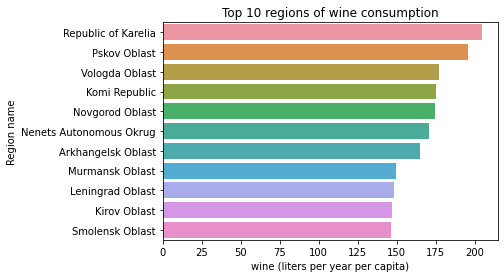

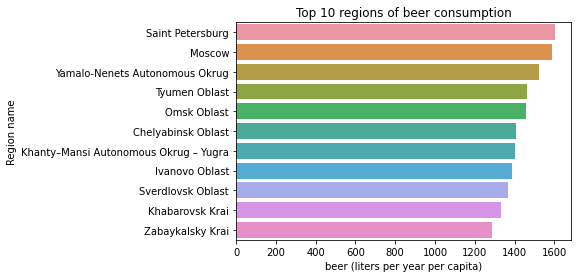

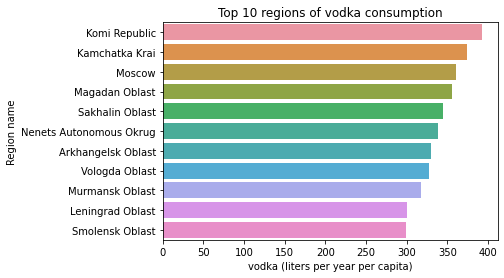

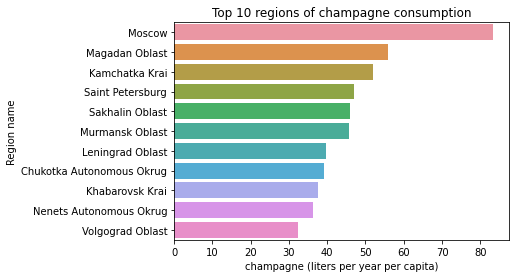

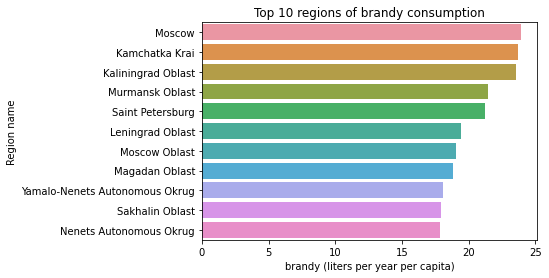

In [10]:
alcohol = ['wine','beer','vodka','champagne','brandy']
for drink in alcohol:
    sns.barplot(x = drink, y = regions_df.nlargest(11, drink).region, data = regions_df.nlargest(11, drink))
    plt.title('Top 10 regions of ' + drink + ' consumption')
    plt.ylabel('Region name')
    plt.xlabel(drink + ' (liters per year per capita)')
    plt.show()

# Recommendations
We have found 10 regions each with high buying trend per type of alcohol. We have also found top 10 regions as below with highest overall alcohol consumption. The marketing team can use strategies to target the regions mentioned below with overall high alcohol buying trend.

In [11]:
rank_df

,region,wine,beer,vodka,champagne,brandy,total_alcohol_consumption
33,Moscow,140.25,1590.08,361.42,83.34,23.90,2198.99
61,Saint Petersburg,132.10,1603.13,224.61,46.91,21.23,2027.98
82,Yamalo-Nenets Autonomous Okrug,100.93,1522.62,286.77,28.23,18.08,1956.63
75,Tyumen Oblast,105.30,1462.05,281.69,27.10,15.99,1892.13
23,Komi Republic,175.25,1249.14,392.43,32.25,15.39,1864.46
21,Khanty–Mansi Autonomous Okrug – Yugra,101.09,1403.06,285.23,27.49,17.56,1834.43
8,Chelyabinsk Oblast,131.94,1408.80,245.93,27.84,10.65,1825.16
80,Vologda Oblast,177.24,1276.93,327.14,16.29,9.84,1807.44
69,Sverdlovsk Oblast,140.27,1367.22,257.71,25.85,13.10,1804.15
12,Ivanovo Oblast,137.51,1387.02,234.84,17.97,7.05,1784.39
